<a href="https://colab.research.google.com/github/bhas10bc/Deep_learning/blob/main/regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [331]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [332]:
loan_details = pd.read_csv('/content/loan-train.csv')
loan_details = loan_details.dropna()
loan_details.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [333]:
ct = make_column_transformer(
    (MinMaxScaler(), ["Dependents", "ApplicantIncome", "CoapplicantIncome","Loan_Amount_Term","Credit_History"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["Gender", "Married", "Education","Self_Employed","Property_Area","Loan_Status"])
)

In [334]:
X = loan_details.drop("LoanAmount", axis=1)
y = loan_details["LoanAmount"]

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((384, 11), (96, 11), (384,), (96,))

In [336]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Dependents', 'ApplicantIncome',
                                  'CoapplicantIncome', 'Loan_Amount_Term',
                                  'Credit_History']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed', 'Property_Area',
                                  'Loan_Status'])])

In [337]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [338]:
tf.random.set_seed(42)

In [339]:
loan_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

In [340]:
loan_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                          metrics=['mae'])

In [341]:
history = loan_model.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [342]:
loan_model.evaluate(X_test_normal, y_test)

3/3 [==============================] - 0s 11ms/step - loss: 40.9383 - mae: 40.9383


[40.93830108642578, 40.93830108642578]

Text(0.5, 0, 'epochs')

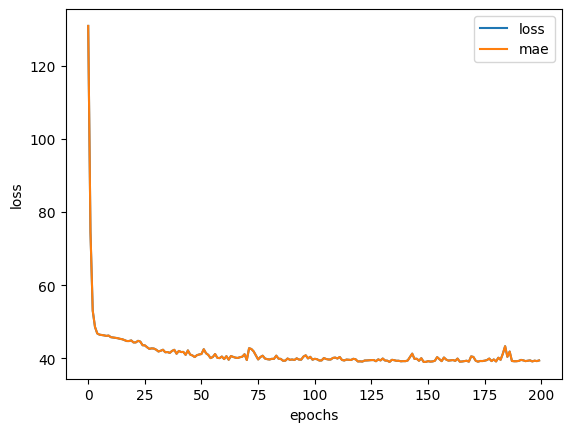

In [343]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [344]:
y_preds = loan_model.predict(X_test_normal)

3/3 [==============================] - 0s 6ms/step


In [345]:
y_preds.shape, y_test.shape

((96, 1), (96,))

In [346]:
y_preds.squeeze().shape

(96,)

In [347]:
y_pred_squeezed = y_preds.squeeze()

In [348]:
y_pred_float = tf.cast(y_pred_squeezed, dtype = tf.float32)

In [349]:
y_test_float = tf.cast(y_test, dtype = tf.float32)

In [350]:
y_test_float.shape, y_test_float.shape, y_test_float.dtype, y_test_float.dtype

(TensorShape([96]), TensorShape([96]), tf.float32, tf.float32)

In [351]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate regression metrics
mae = mean_absolute_error(y_test_float, y_pred_float)
mse = mean_squared_error(y_test_float, y_pred_float)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 40.938297
Mean Squared Error: 4151.807
Root Mean Squared Error: 64.43452


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual values in red
plt.scatter(y_test_float, y_test_float, color='red', label='Actual', alpha=0.5)  # alpha controls transparency

# Scatter plot of predicted values in blue
plt.scatter(y_test_float, y_pred_float, color='blue', label='Predicted', alpha=0.5)  # alpha controls transparency

# Adding labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.legend()  # Show legend with labels
plt.show()




In [353]:
loan_model.save('loan_model')